In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve



In [3]:
from google.colab import files
uploaded = files.upload()


Saving mental_health_workplace_survey.csv to mental_health_workplace_survey.csv


In [5]:
import pandas as pd
df = pd.read_csv("mental_health_workplace_survey.csv")

In [6]:
df.drop(columns=['EmployeeID', 'Country'], inplace=True)

In [7]:
target = 'BurnoutRisk'
categorical = ['Gender', 'JobRole', 'Department', 'RemoteWork',
               'HasMentalHealthSupport', 'HasTherapyAccess', 'SalaryRange']
numerical = df.drop(columns=categorical + [target]).select_dtypes(include=['int64', 'float64']).columns.tolist()


In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical)
])


In [10]:
X = df.drop(columns=[target])
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [11]:
X_train_p = preprocessor.fit_transform(X_train)
X_test_p = preprocessor.transform(X_test)


In [12]:
logreg = LogisticRegression(max_iter=1000)
lda = LinearDiscriminantAnalysis()

logreg.fit(X_train_p, y_train)
lda.fit(X_train_p, y_train)


LinearDiscriminantAnalysis()

In [13]:
y_pred_log = logreg.predict(X_test_p)
y_prob_log = logreg.predict_proba(X_test_p)[:, 1]
y_pred_lda = lda.predict(X_test_p)
y_prob_lda = lda.predict_proba(X_test_p)[:, 1]

In [15]:
def evaluate(name, y_true, y_pred, y_prob):
    acc = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    auc = roc_auc_score(y_true, y_prob)
    print(f"=== {name} ===")
    print(f"Accuracy: {acc:.3f}")
    print("Confusion Matrix:")
    print(cm)
    print(f"ROC-AUC: {auc:.3f}\n")
    return acc, cm, auc

eval_log = evaluate("Logistic Regression", y_test, y_pred_log, y_prob_log)
eval_lda = evaluate("LDA", y_test, y_pred_lda, y_prob_lda)




=== Logistic Regression ===
Accuracy: 0.990
Confusion Matrix:
[[400   4]
 [  2 194]]
ROC-AUC: 1.000

=== LDA ===
Accuracy: 0.942
Confusion Matrix:
[[369  35]
 [  0 196]]
ROC-AUC: 0.998



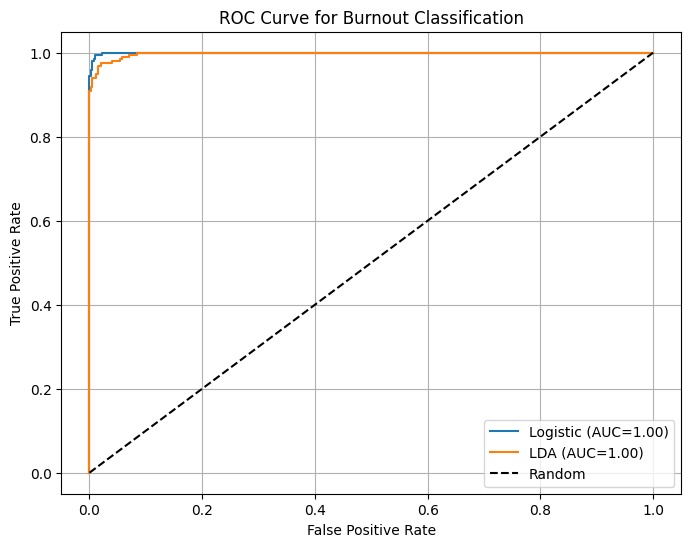

In [16]:
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_lda, tpr_lda, _ = roc_curve(y_test, y_prob_lda)

plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, label=f"Logistic (AUC={eval_log[2]:.2f})")
plt.plot(fpr_lda, tpr_lda, label=f"LDA (AUC={eval_lda[2]:.2f})")
plt.plot([0,1], [0,1], 'k--', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Burnout Classification")
plt.legend()
plt.grid(True)
plt.show()